# Import Libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

# Web Scrapping

In [5]:
!pip install google-play-scraper

In [24]:
from google_play_scraper import Sort, reviews

result = reviews(
    'com.traveloka.android',
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=5000
)

## Create Dataset

In [26]:
df = pd.DataFrame(np.array(result[0]), columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df

reviewId                userName  \
0     9bd36bb7-4c06-4201-99fd-42a4f9c61dbd         Pengguna Google   
1     c44ce3cd-948d-4991-a300-e6f4bd37787a         Pengguna Google   
2     6d48ea4a-c0ee-4bc7-b33e-cb5112d81eab         Pengguna Google   
3     9f218916-cc13-4a68-8297-222a5cb2b828         Pengguna Google   
4     9060209d-9307-4f84-9c12-4383935999f5         Pengguna Google   
...                                    ...                     ...   
4995  a3be2883-0bd5-4238-9911-ea999243fa2e  Najmi Nadhira Fanshuri   
4996  0fd23f0f-f394-40fd-ad8a-edb8082bd5e7              aliel dewa   
4997  dc8e8987-7988-4e60-9dda-4c8b66f9d5a2                Dwi Fuji   
4998  ad991999-0f69-4e49-96f7-6c40e9f7e11d         Deni firmandani   
4999  6ef6c2e7-b094-4230-b0f0-16f4f2472326              Azis Abdul   

                                              userImage  \
0     https://play-lh.googleusercontent.com/EGemoI2N...   
1     https://play-lh.googleusercontent.com/EGemoI2N...   
2     https://play-lh.googleusercontent.com/EGemoI2N...   
3     https://play-lh.googleusercontent.com/EGemoI2N...   
4     https://play-lh.googleusercontent.com/EGemoI2N...   
...                                                 ...   
4995  https://play-lh.googleusercontent.com/a/ACg8oc...   
4996  https://play-lh.googleusercontent.com/a-/ALV-U...   
4997  https://play-lh.googleusercontent.com/a/ACg8oc...   
4998  https://play-lh.googleusercontent.com/a/ACg8oc...   
4999  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                                content  score  thumbsUpCount  \
0                                               Mantaap      5              0   
1               mantap rekomended utk beli tiket kereta      5              0   
2                                                Mantap      5              0   
3     kecewa bngt pihak maskapai menyatakan tanggung...      1              0   
4                                                Mantap      5              0   
...                                                 ...    ...            ...   
4995                                              Bagus      5              0   
4996                                               Siip      4              0   
4997                                  mudah dan praktis      5              0   
4998  Beli tiket pulang pergi... 2 blm sblm brmgkt, ...      1              2   
4999  Kenapa sekarang Traveloka jadi sering pembatal...      1              0   

     reviewCreatedVersion                  at  \
0                  5.12.0 2025-02-05 22:25:53   
1                  5.12.0 2025-02-05 20:30:48   
2                   5.8.1 2025-02-05 20:26:58   
3                    None 2025-02-05 20:23:32   
4                    None 2025-02-05 20:07:38   
...                   ...                 ...   
4995               3.97.0 2024-03-22 17:03:00   
4996                 None 2024-03-22 16:51:04   
4997               3.97.0 2024-03-22 16:13:11   
4998               3.97.0 2024-03-22 16:13:09   
4999               3.97.0 2024-03-22 15:58:16   

                                           replyContent           repliedAt  \
0     Hello! Thank you very much for the positive re... 2025-02-05 22:35:07   
1     Halo Kak, terima kasih banyak atas ratingnya. ... 2025-02-05 20:35:06   
2     Hai Kak, senang sekali dapat rating bagus dari... 2025-02-05 20:35:08   
3     Hai Refliani. Mohon maaf atas ketidaknyamanan ... 2025-02-05 20:59:40   
4     Hai Kak, terima kasih atas feedbacknya. Jika K... 2025-02-05 20:35:12   
...                                                 ...                 ...   
4995  Halo Kak, terima kasih banyak atas ratingnya. ... 2024-03-22 17:28:41   
4996  Hello! Thank you very much for the positive re... 2024-03-22 16:58:42   
4997  Halo Kak, terima kasih banyak atas ratingnya. ... 2024-03-22 16:28:42   
4998  Hai Deni, mohon maaf atas kekecewaan Anda. Jam... 2024-03-22 16:48:38   
4999  Halo Azis, kami meminta maaf atas ketidaknyama.

# Dataset Transformation

## Check App Version

In [29]:
df['reviewCreatedVersion'].unique()

array(['5.12.0', '5.8.1', None, '5.11.0', '3.32.0', '5.0.1', '3.94.0',
       '5.8.0', '5.6.0', '3.102.0', '5.10.1', '3.60.0', '5.5.2', '5.5.1',
       '3.53.0', '5.3.0', '3.45.0', '5.9.0', '5.4.1', '3.52.0', '5.9.1',
       '3.55.1', '3.90.0', '3.98.1', '3.19.0', '5.2.0', '3.73.0',
       '3.59.0', '5.7.0', '3.98.0', '5.10.0', '5.7.1', '3.36.1', '3.95.0',
       '3.30.0', '3.76.0', '3.99.0', '5.5.0', '3.23.1', '3.54.2',
       '3.30.1', '3.26.1', '5.1.1', '3.51.2', '3.31.2', '3.88.0',
       '3.37.0', '3.17.3', '5.0.0', '3.25.1', '3.64.0', '3.41.0',
       '3.63.1', '3.79.0', '1.3.1', '3.85.1', '3.93.0', '3.101.0',
       '3.69.0', '3.24.1', '3.82.0', '3.9.1', '2.18.1', '3.56.1',
       '3.42.1', '3.92.0', '3.67.0', '3.28.0', '3.18.0', '3.6.0', '1.5.0',
       '3.65.0', '5.1.0', '3.43.1', '2.7.1', '3.48.0', '3.100.1',
       '3.72.0', '5.4.0', '3.27.1', '3.75.0', '3.21.1', '3.22.1',
       '3.49.1', '3.71.1', '3.14.0', '3.74.1', '3.70.1', '3.96.0',
       '3.84.0', '3.8.0', '3.1.1', '

In [30]:
df['major_version'] = df['reviewCreatedVersion'].str.split('.').str[0]
df.head()

reviewId         userName  \
0  9bd36bb7-4c06-4201-99fd-42a4f9c61dbd  Pengguna Google   
1  c44ce3cd-948d-4991-a300-e6f4bd37787a  Pengguna Google   
2  6d48ea4a-c0ee-4bc7-b33e-cb5112d81eab  Pengguna Google   
3  9f218916-cc13-4a68-8297-222a5cb2b828  Pengguna Google   
4  9060209d-9307-4f84-9c12-4383935999f5  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0                                            Mantaap      5              0   
1            mantap rekomended utk beli tiket kereta      5              0   
2                                             Mantap      5              0   
3  kecewa bngt pihak maskapai menyatakan tanggung...      1              0   
4                                             Mantap      5              0   

  reviewCreatedVersion                  at  \
0               5.12.0 2025-02-05 22:25:53   
1               5.12.0 2025-02-05 20:30:48   
2                5.8.1 2025-02-05 20:26:58   
3                 None 2025-02-05 20:23:32   
4                 None 2025-02-05 20:07:38   

                                        replyContent           repliedAt  \
0  Hello! Thank you very much for the positive re... 2025-02-05 22:35:07   
1  Halo Kak, terima kasih banyak atas ratingnya. ... 2025-02-05 20:35:06   
2  Hai Kak, senang sekali dapat rating bagus dari... 2025-02-05 20:35:08   
3  Hai Refliani. Mohon maaf atas ketidaknyamanan ... 2025-02-05 20:59:40   
4  Hai Kak, terima kasih atas feedbacknya. Jika K... 2025-02-05 20:35:12   

  appVersion major_version  
0     5.12.0             5  
1     5.12.0             5  
2      5.8.1             5  
3       None          None  
4       None          None

In [31]:
df['major_version'].unique()

array(['5', None, '3', '1', '2'], dtype=object)

## Select Only 5.X.X Version

In [33]:
df = df[df['major_version'] == '5']
df['major_version'].unique()

array(['5'], dtype=object)

In [34]:
df.head()

reviewId         userName  \
0  9bd36bb7-4c06-4201-99fd-42a4f9c61dbd  Pengguna Google   
1  c44ce3cd-948d-4991-a300-e6f4bd37787a  Pengguna Google   
2  6d48ea4a-c0ee-4bc7-b33e-cb5112d81eab  Pengguna Google   
5  50c11fd4-cb43-4509-b6e4-36d8dc84cb6f  Pengguna Google   
7  9960deac-ff99-4250-b296-6b11f762bb8e  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
5  https://play-lh.googleusercontent.com/EGemoI2N...   
7  https://play-lh.googleusercontent.com/EGemoI2N...   

                                   content  score  thumbsUpCount  \
0                                  Mantaap      5              0   
1  mantap rekomended utk beli tiket kereta      5              0   
2                                   Mantap      5              0   
5    Upload video tapi suarana suka hilang      4              0   
7                                     nice      5              0   

  reviewCreatedVersion                  at  \
0               5.12.0 2025-02-05 22:25:53   
1               5.12.0 2025-02-05 20:30:48   
2                5.8.1 2025-02-05 20:26:58   
5               5.12.0 2025-02-05 18:17:58   
7               5.12.0 2025-02-05 16:32:34   

                                        replyContent           repliedAt  \
0  Hello! Thank you very much for the positive re... 2025-02-05 22:35:07   
1  Halo Kak, terima kasih banyak atas ratingnya. ... 2025-02-05 20:35:06   
2  Hai Kak, senang sekali dapat rating bagus dari... 2025-02-05 20:35:08   
5  Hai Arlina, terima kasih atas penilaian Anda. ... 2025-02-05 19:08:34   
7  Hello! Thank you very much for the positive re... 2025-02-05 16:35:06   

  appVersion major_version  
0     5.12.0             5  
1     5.12.0             5  
2      5.8.1             5  
5     5.12.0             5  
7     5.12.0             5

## Final Dataset

In [36]:
df = df[['content', 'score', 'reviewCreatedVersion']]
df.head()

content  score reviewCreatedVersion
0                                  Mantaap      5               5.12.0
1  mantap rekomended utk beli tiket kereta      5               5.12.0
2                                   Mantap      5                5.8.1
5    Upload video tapi suarana suka hilang      4               5.12.0
7                                     nice      5               5.12.0

# Exploratory Data Analysis (EDA)

## Distribution of Score

<Figure size 600x300 with 0 Axes>

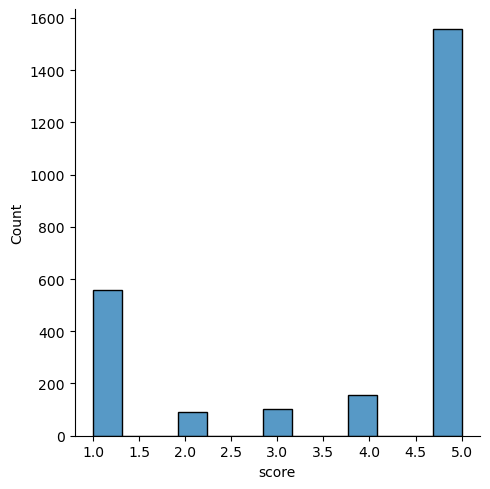

In [39]:
plt.figure(figsize = (6,3))
sns.displot(data = df, x = 'score')
plt.show()

## Score Composition

In [41]:
score = df['score']

score_counts = score.value_counts().sort_values(ascending=False)
score_counts

score
5    1556
1     557
4     155
3     103
2      90
Name: count, dtype: int64

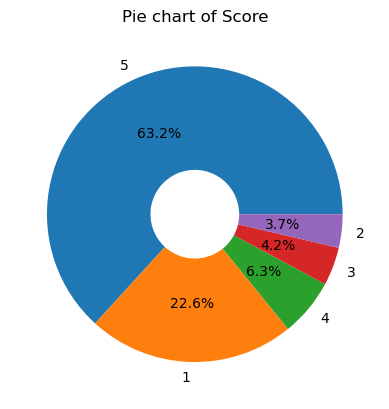

In [42]:
# create a pie chart
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', wedgeprops=dict(width=0.7))

# add title
plt.title('Pie chart of Score')

# show the plot
plt.show()

## Average Score Distribution of Each Minor Version (5.X.X)

In [44]:
pivot_table = pd.pivot_table(data = df, index = 'reviewCreatedVersion', values = 'score', aggfunc = 'mean')

pivot_table['minor_version_1'] = pd.to_numeric(pivot_table.index.str.split('.').str[1])
pivot_table['minor_version_2'] = pd.to_numeric(pivot_table.index.str.split('.').str[2])

pivot_table = pivot_table.sort_values(['minor_version_1', 'minor_version_2'], ascending=[True, True])
pivot_table

score  minor_version_1  minor_version_2
reviewCreatedVersion                                            
5.0.0                 3.865591                0                0
5.0.1                 3.885714                0                1
5.1.0                 3.725000                1                0
5.1.1                 4.029787                1                1
5.2.0                 3.913978                2                0
5.3.0                 3.806250                3                0
5.4.0                 2.000000                4                0
5.4.1                 3.914474                4                1
5.5.0                 3.633803                5                0
5.5.1                 3.601942                5                1
5.5.2                 3.932692                5                2
5.6.0                 3.687075                6                0
5.7.0                 4.164384                7                0
5.7.1                 3.452055                7                1
5.8.0                 3.789916                8                0
5.8.1                 4.050000                8                1
5.9.0                 3.838710                9                0
5.9.1                 3.940000                9                1
5.10.0                3.618182               10                0
5.10.1                3.733990               10                1
5.11.0                3.910448               11                0
5.12.0                4.020833               12                0

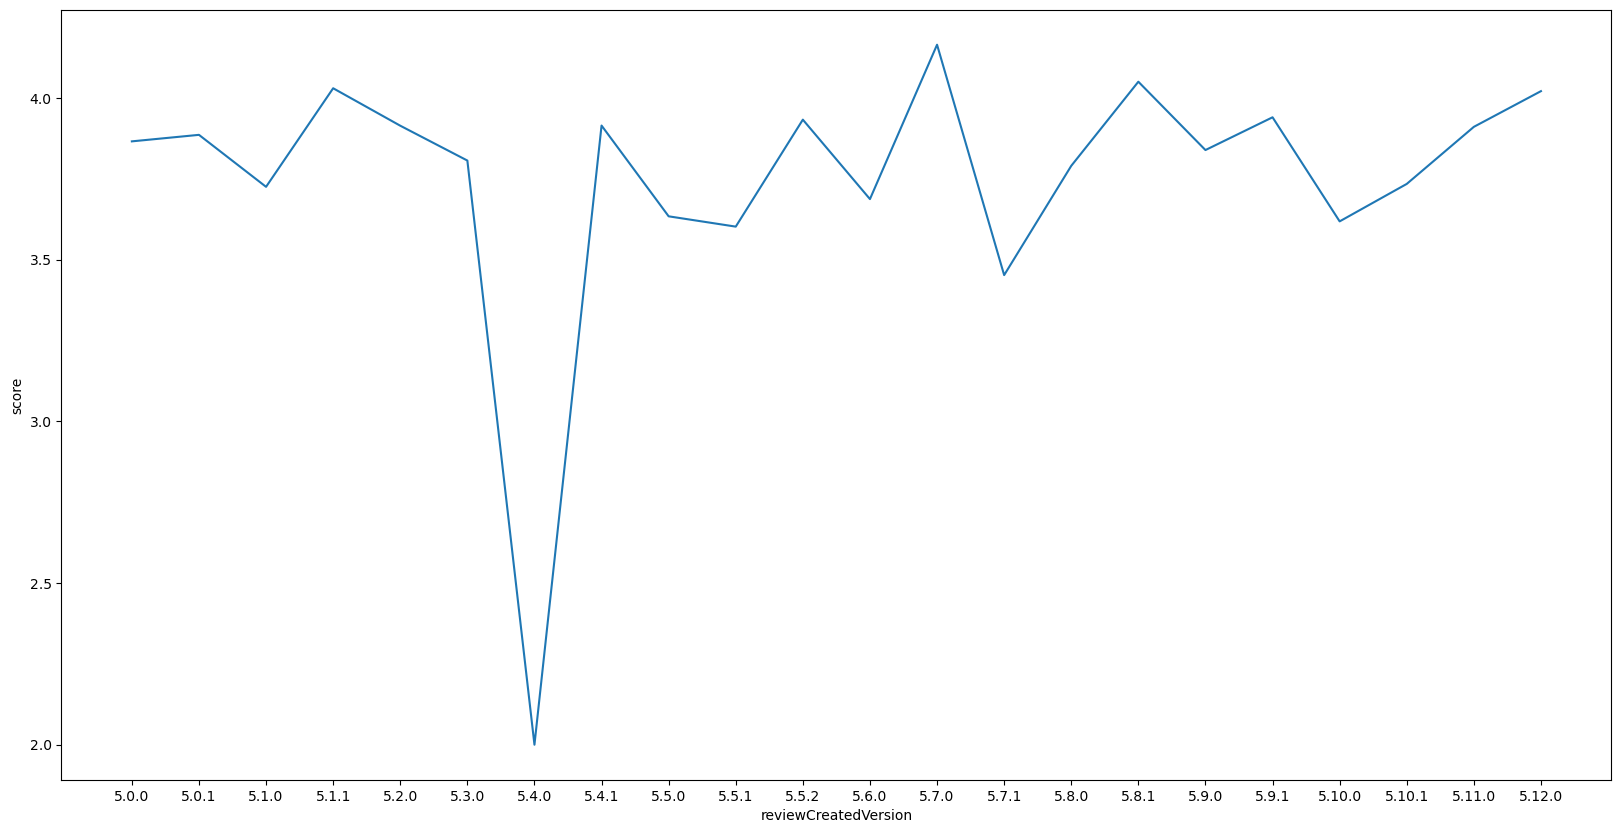

In [45]:
plt.figure(figsize = (20,10))
sns.lineplot(data = pivot_table, x = pivot_table.index, y = 'score')
plt.show()

## Word Cloud

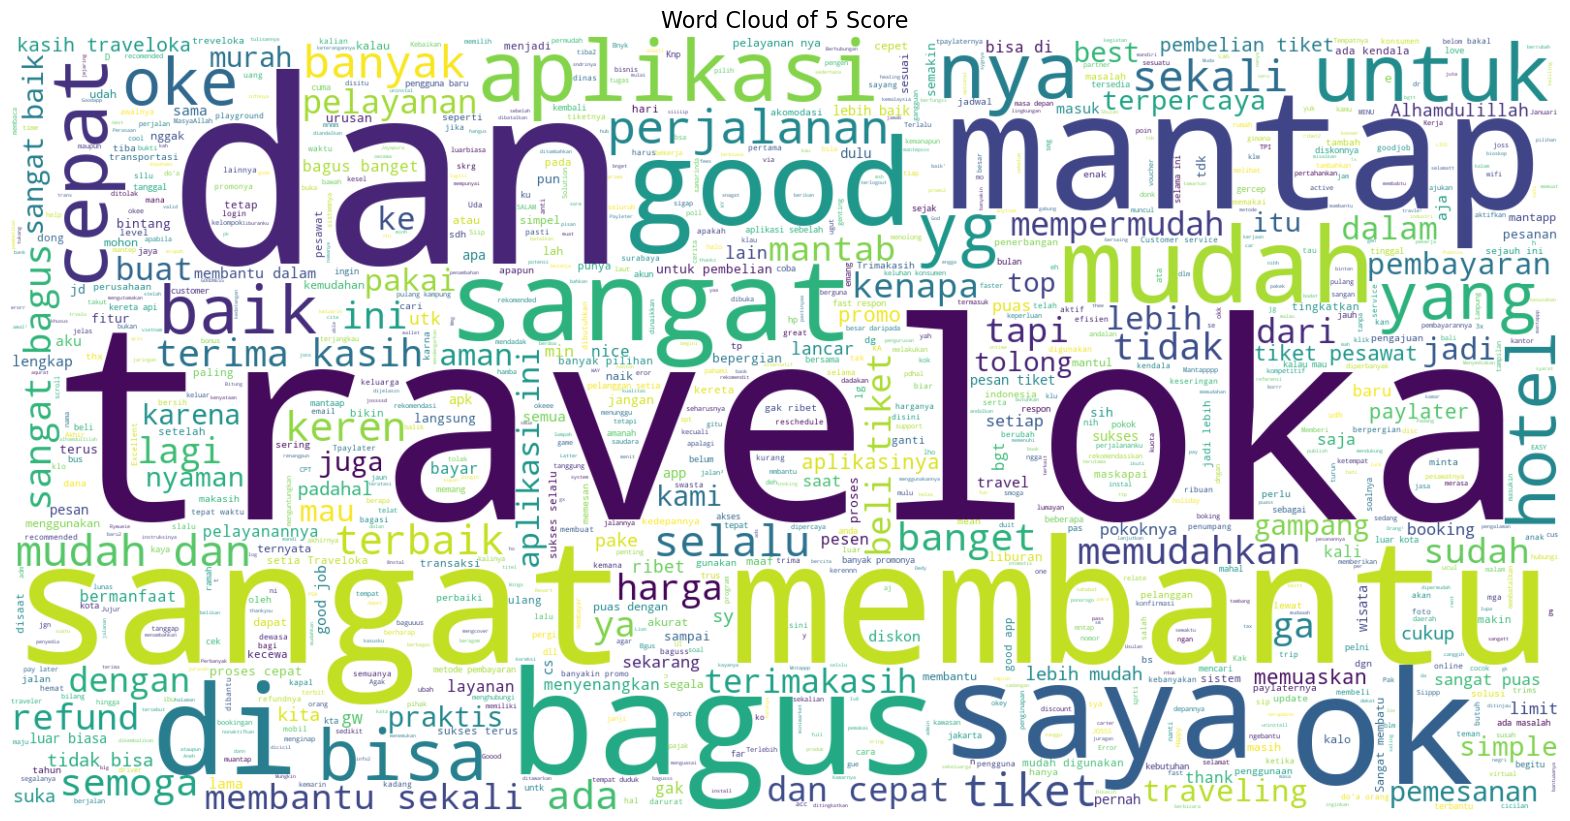

In [47]:
df_5 = df[df['score'] == 5]
df_5 = ' '.join(df_5['content'].astype(str))

# Create the WordCloud object and assign it to wc
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis'
).generate(df_5)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title("Word Cloud of 5 Score", fontsize=16)
plt.imshow(wc, interpolation='bilinear')
plt.show()

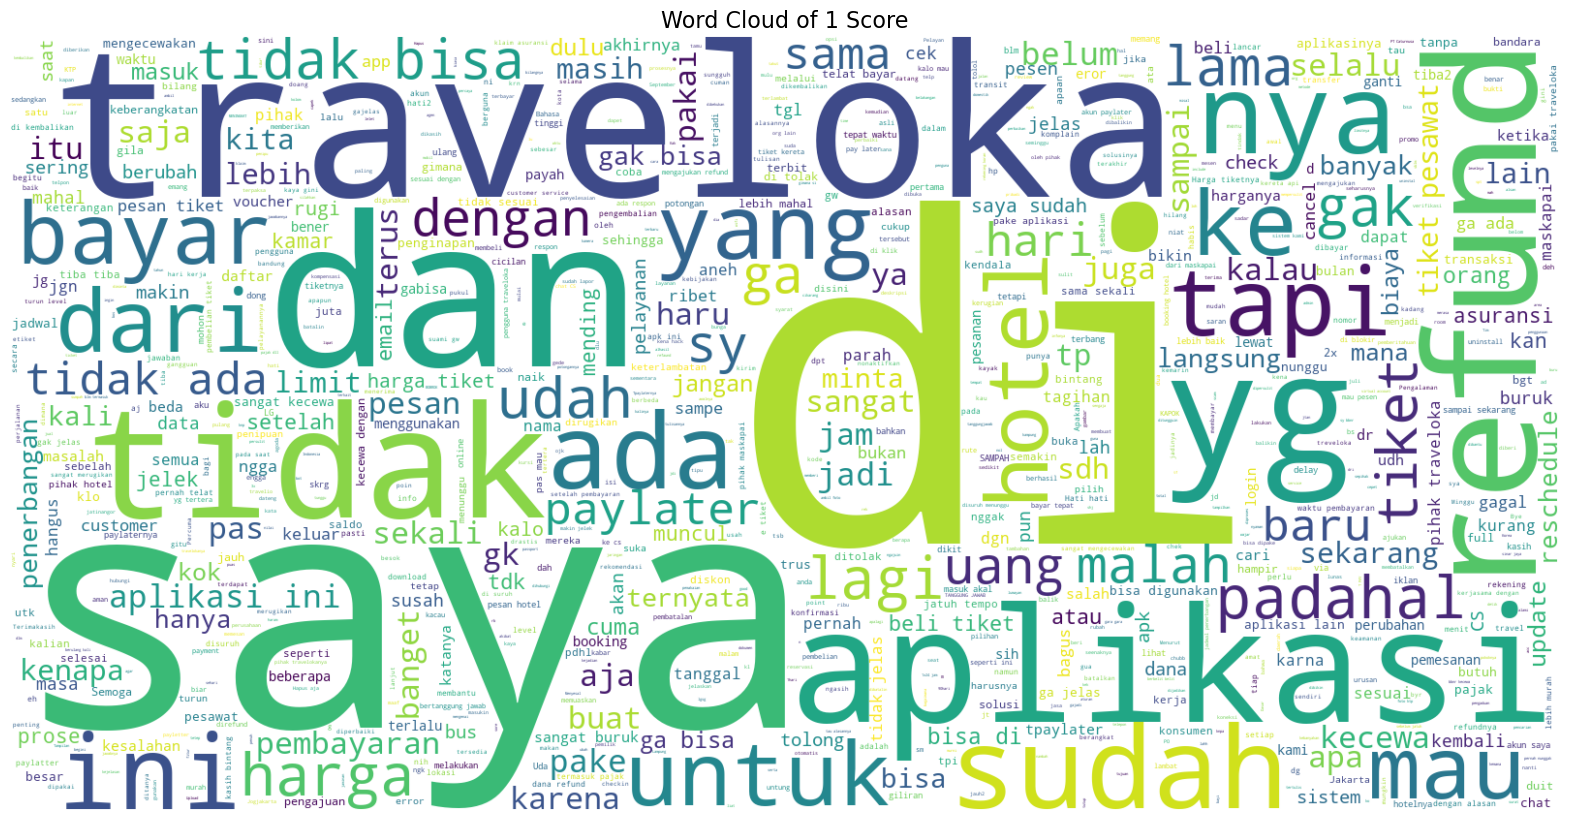

In [48]:
df_1 = df[df['score'] == 1]
df_1 = ' '.join(df_1['content'].astype(str))

# Create the WordCloud object and assign it to wc
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis'
).generate(df_1)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title("Word Cloud of 1 Score", fontsize=16)
plt.imshow(wc, interpolation='bilinear')
plt.show()

# Data Pre-processing

## Copy Dataframe

In [51]:
df_cp = df.copy().reset_index(drop = True)
df_cp.head()

content  score reviewCreatedVersion
0                                  Mantaap      5               5.12.0
1  mantap rekomended utk beli tiket kereta      5               5.12.0
2                                   Mantap      5                5.8.1
3    Upload video tapi suarana suka hilang      4               5.12.0
4                                     nice      5               5.12.0

## Check Missing Value

In [53]:
df_cp.isnull().sum()

content                 0
score                   0
reviewCreatedVersion    0
dtype: int64

## Translate to English

In [62]:
!pip install deep-translator

In [76]:
from deep_translator import GoogleTranslator
import time

def translate_with_delay(text):
    time.sleep(1)  # Add delay to prevent rate limiting
    return GoogleTranslator(source='id', target='en').translate(text)

df_cp['english_text'] = df_cp['content'].apply(lambda x: translate_with_delay(x))
df_cp

content  score  \
0                                               Mantaap      5   
1               mantap rekomended utk beli tiket kereta      5   
2                                                Mantap      5   
3                 Upload video tapi suarana suka hilang      4   
4                                                  nice      5   
...                                                 ...    ...   
2456                                          good jobs      5   
2457                          Great online travel agent      5   
2458                                               nice      5   
2459  Plis jgn rekomen tgl lain dong, aku jd slah pe...      4   
2460                                         Terbaik 👍👍      5   

     reviewCreatedVersion                                       english_text  
0                  5.12.0                                            Awesome  
1                  5.12.0         great recommended for buying train tickets  
2                   5.8.1                                          Excellent  
3                  5.12.0    Upload a video but the sound seems to disappear  
4                  5.12.0                                               nice  
...                   ...                                                ...  
2456                5.0.0                                           good job  
2457                5.0.0                          Great online travel agent  
2458                5.0.0                                               nice  
2459                5.0.0  Please don't recommend other dates, because I ...  
2460                5.0.0                                        The best 👍👍  

[2461 rows x 4 columns]

# Vader

In [78]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MARULI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [80]:
sia = SentimentIntensityAnalyzer()

def sentiment_vader(text):
    compound_polarity = sia.polarity_scores(text)
    
    if compound_polarity['compound'] >= 0.05:
        return 'Positive'
    elif compound_polarity['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [88]:
df_cp.dropna(inplace = True)

df_cp['Label'] = df_cp['english_text'].apply(lambda text: sentiment_vader(text))
df_cp.head()

content  score reviewCreatedVersion  \
0                                  Mantaap      5               5.12.0   
1  mantap rekomended utk beli tiket kereta      5               5.12.0   
2                                   Mantap      5                5.8.1   
3    Upload video tapi suarana suka hilang      4               5.12.0   
4                                     nice      5               5.12.0   

                                      english_text     Label  
0                                          Awesome  Positive  
1       great recommended for buying train tickets  Positive  
2                                        Excellent  Positive  
3  Upload a video but the sound seems to disappear  Negative  
4                                             nice  Positive

In [92]:
df_cp.to_csv("result.csv")

# Exploratory Data Analysis (EDA) for New Dataset

## Label Composition

In [231]:
label = df_cp['Label']

label_counts = label.value_counts().sort_values(ascending=False)
label_counts

Label
Positive    1603
Negative     482
Neutral      355
Name: count, dtype: int64

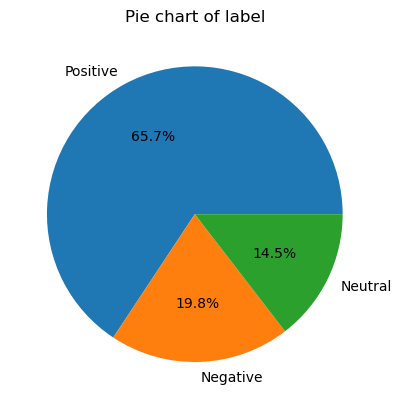

In [232]:
# create a pie chart
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')

# add title
plt.title('Pie chart of label')

# show the plot
plt.show()

## Label Distribution

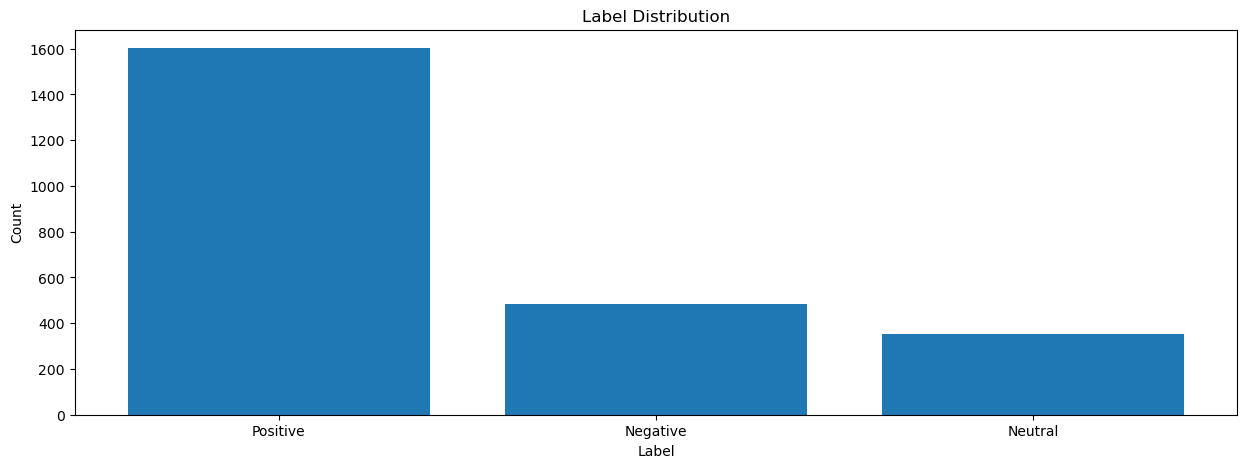

In [263]:
plt.figure(figsize = (15,5))
plt.bar(label_counts.index, label_counts)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## Word Cloud of Each Label

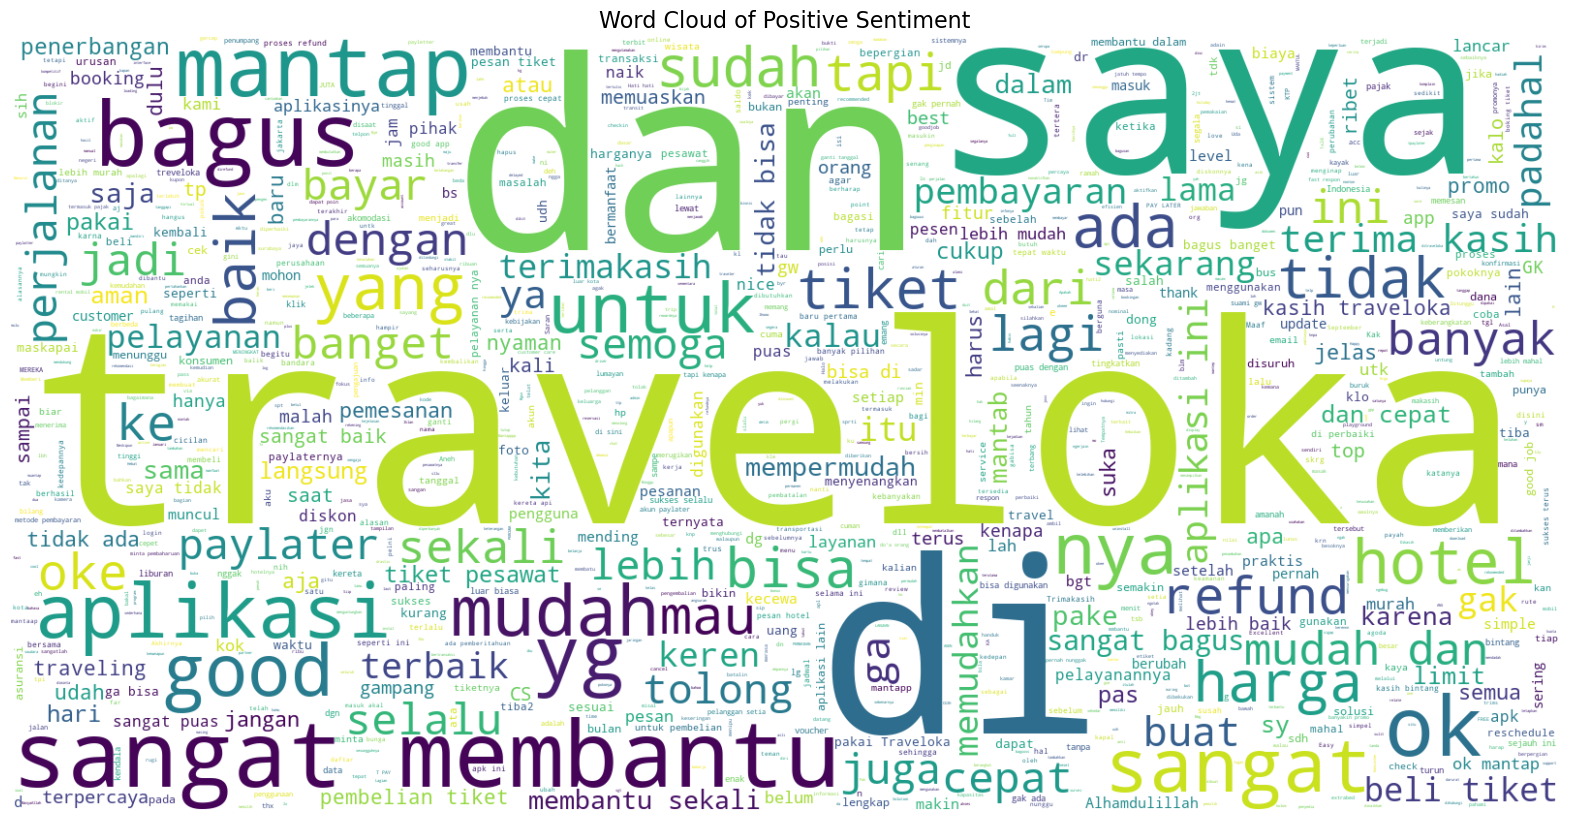

In [234]:
df_pos = df_cp[df_cp['Label'] == 'Positive']
df_pos = ' '.join(df_pos['content'].astype(str))

# Create the WordCloud object and assign it to wc
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis'
).generate(df_pos)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title("Word Cloud of Positive Sentiment", fontsize=16)
plt.imshow(wc, interpolation='bilinear')
plt.show()

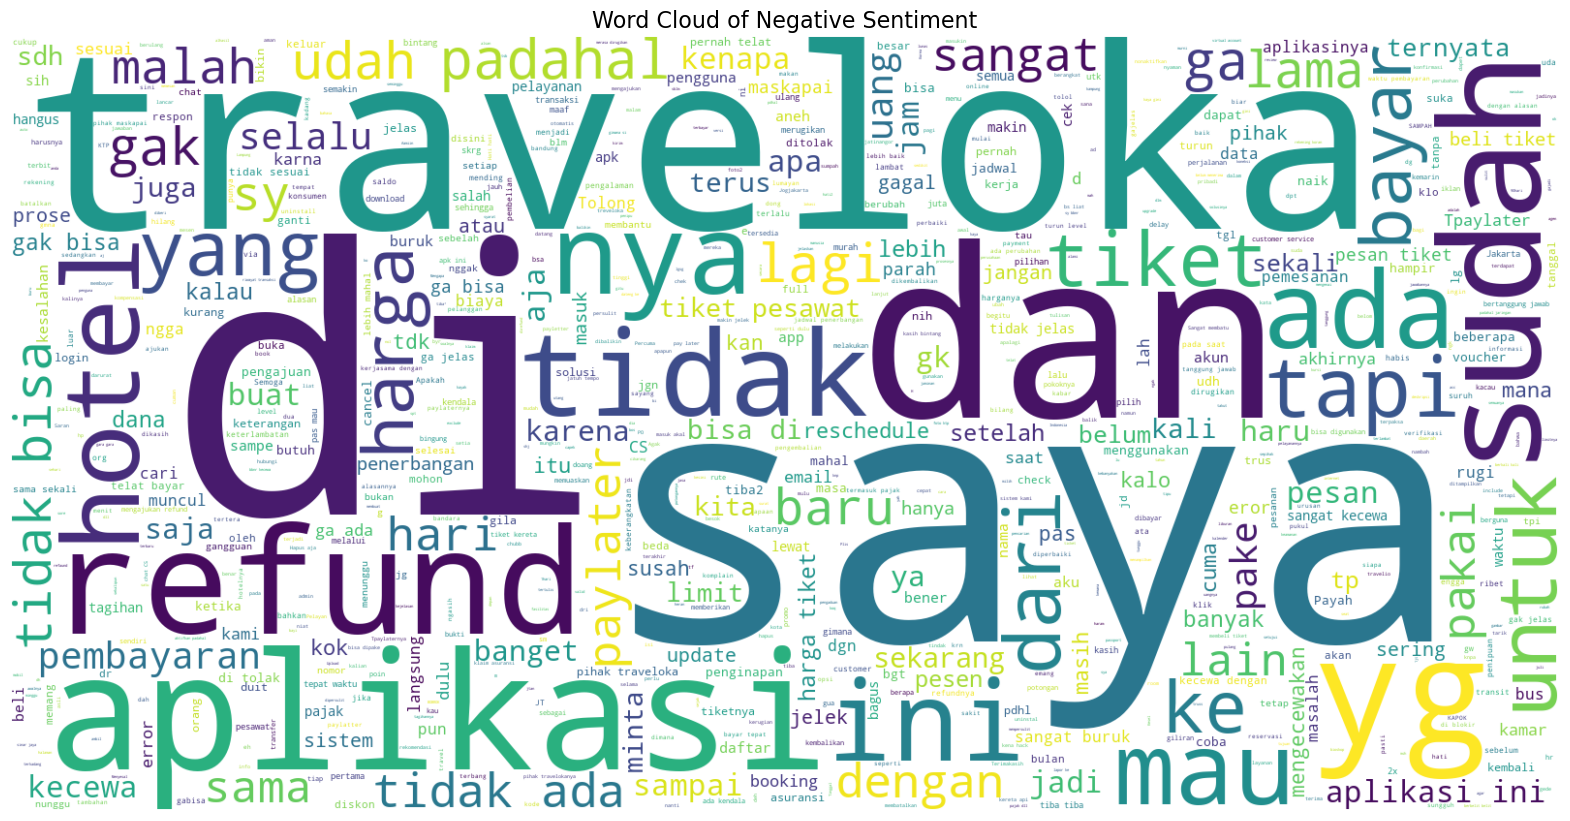

In [235]:
df_neg = df_cp[df_cp['Label'] == 'Negative']
df_neg = ' '.join(df_neg['content'].astype(str))

# Create the WordCloud object and assign it to wc
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis'
).generate(df_neg)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title("Word Cloud of Negative Sentiment", fontsize=16)
plt.imshow(wc, interpolation='bilinear')
plt.show()

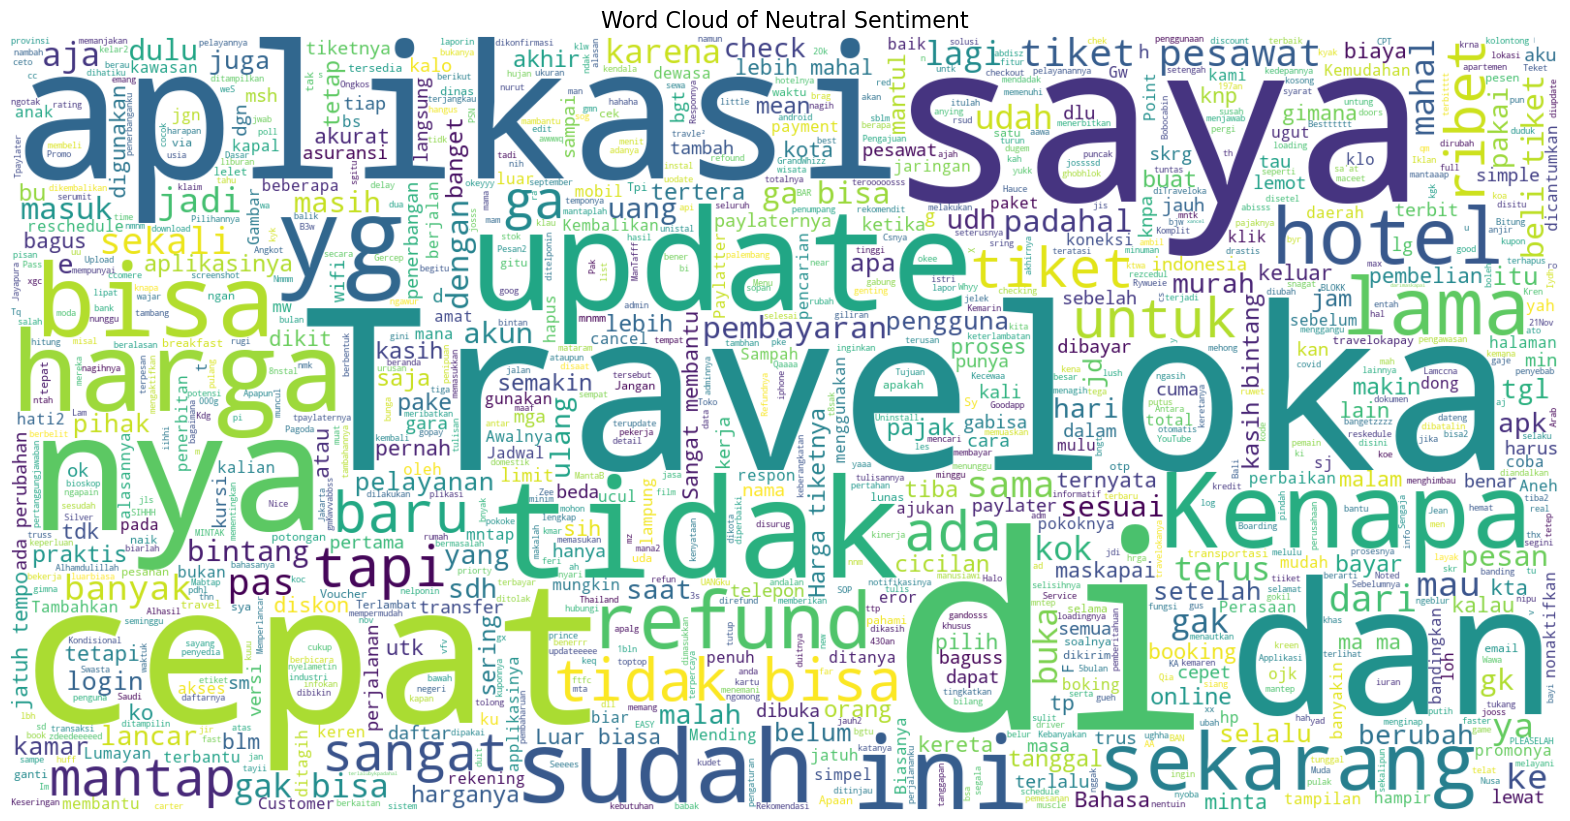

In [236]:
df_neu = df_cp[df_cp['Label'] == 'Neutral']
df_neu = ' '.join(df_neu['content'].astype(str))

# Create the WordCloud object and assign it to wc
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis'
).generate(df_neu)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title("Word Cloud of Neutral Sentiment", fontsize=16)
plt.imshow(wc, interpolation='bilinear')
plt.show()

## EDA for Lastest Version (5.12.0)

In [238]:
df_lastest = df_cp[df_cp['reviewCreatedVersion'] == '5.12.0']
df_lastest.head()

content  score reviewCreatedVersion  \
0                                  Mantaap      5               5.12.0   
1  mantap rekomended utk beli tiket kereta      5               5.12.0   
3    Upload video tapi suarana suka hilang      4               5.12.0   
4                                     nice      5               5.12.0   
5                                    bagus      5               5.12.0   

                                      english_text     Label  
0                                          Awesome  Positive  
1       great recommended for buying train tickets  Positive  
3  Upload a video but the sound seems to disappear  Negative  
4                                             nice  Positive  
5                                             Good  Positive

### Label Distribution of Lastest Version (5.12.0)

In [240]:
label = df_lastest['Label']

lastest_label_counts = label.value_counts().sort_values(ascending=False)
lastest_label_counts

Label
Positive    33
Neutral      8
Negative     7
Name: count, dtype: int64

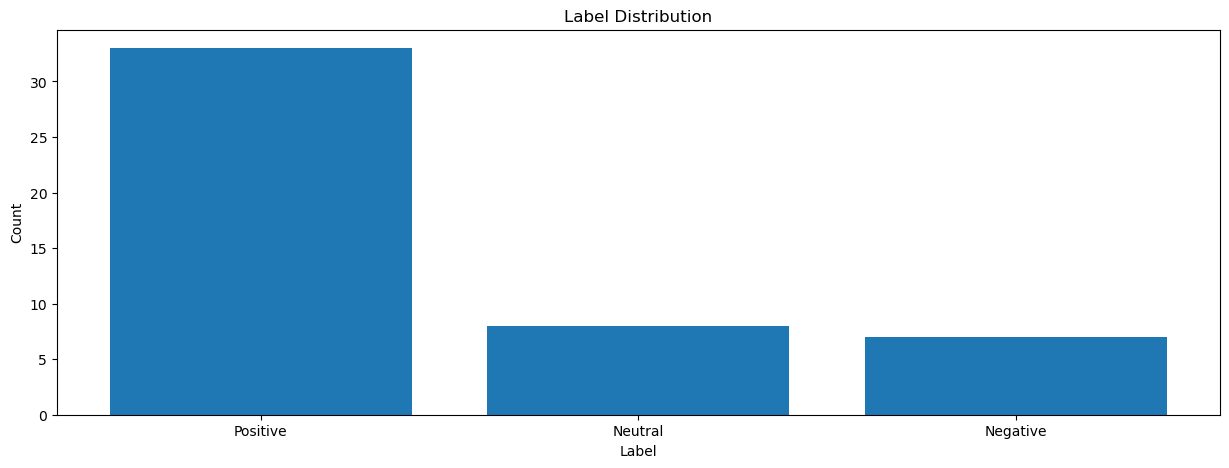

In [241]:
plt.figure(figsize = (15,5))
plt.bar(lastest_label_counts.index, lastest_label_counts)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

### Label Composition of Lastest Version (5.12.0)

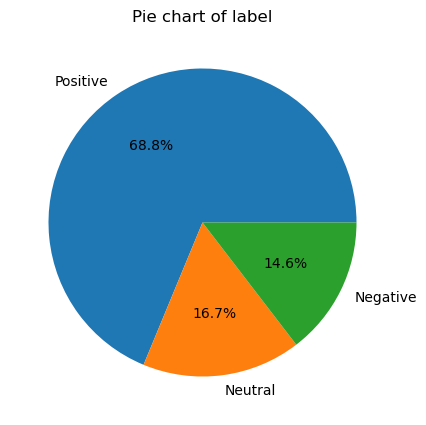

In [243]:
plt.figure(figsize = (15,5))
plt.pie(lastest_label_counts, labels = lastest_label_counts.index, autopct='%1.1f%%')
plt.title('Pie chart of label')
plt.show()

### Word Cloud of Lastest Version (5.12.0)

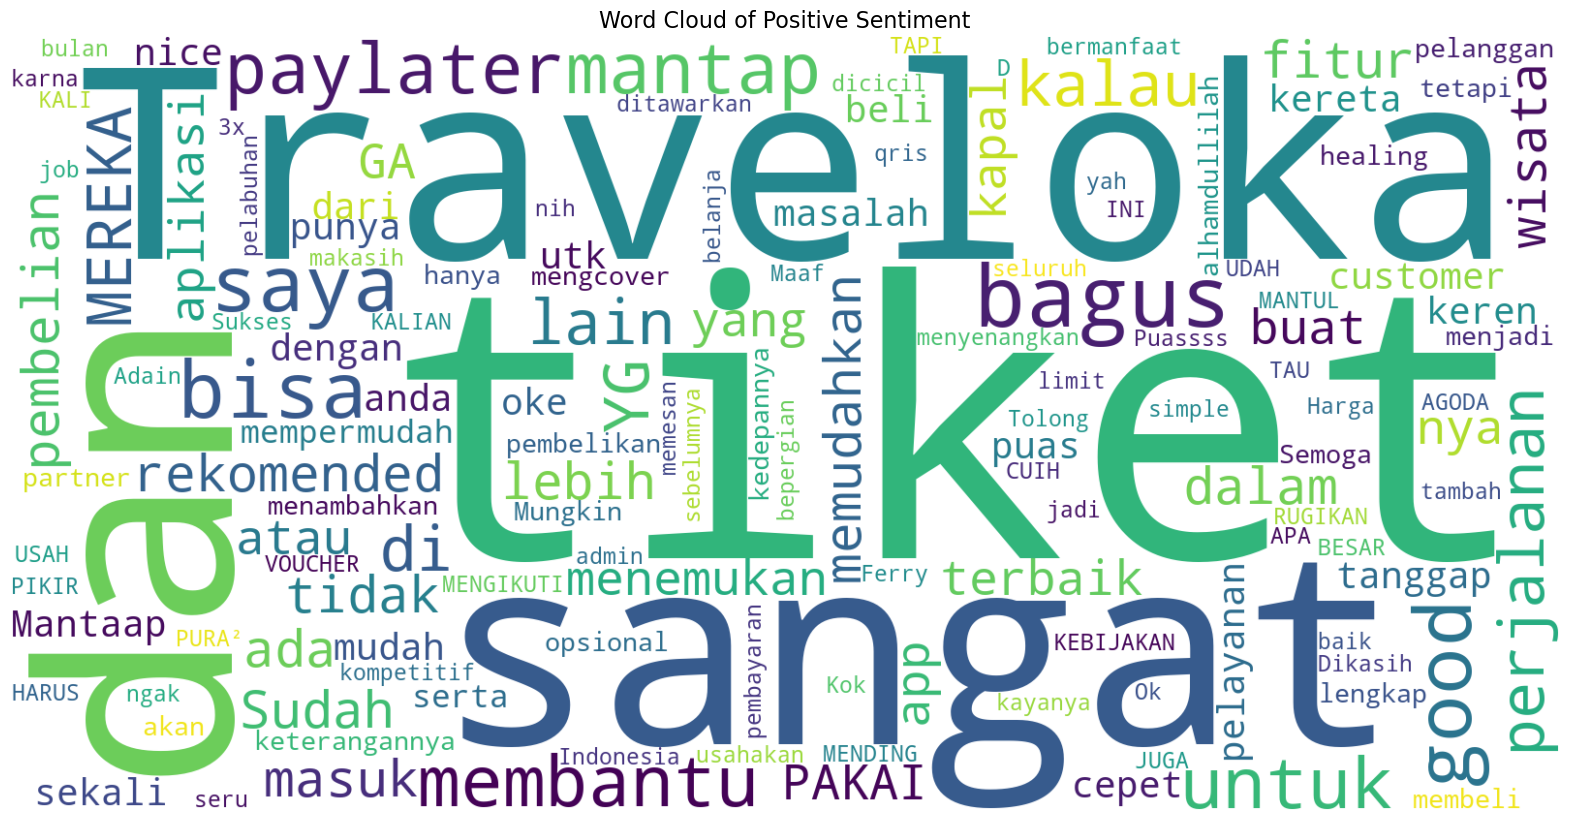

In [258]:
df_pos_lastest = df_lastest[df_lastest['Label'] == 'Positive']
df_pos_lastest = ' '.join(df_pos_lastest['content'].astype(str))

# Create the WordCloud object and assign it to wc
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis'
).generate(df_pos_lastest)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title("Word Cloud of Positive Sentiment", fontsize=16)
plt.imshow(wc, interpolation='bilinear')
plt.show()

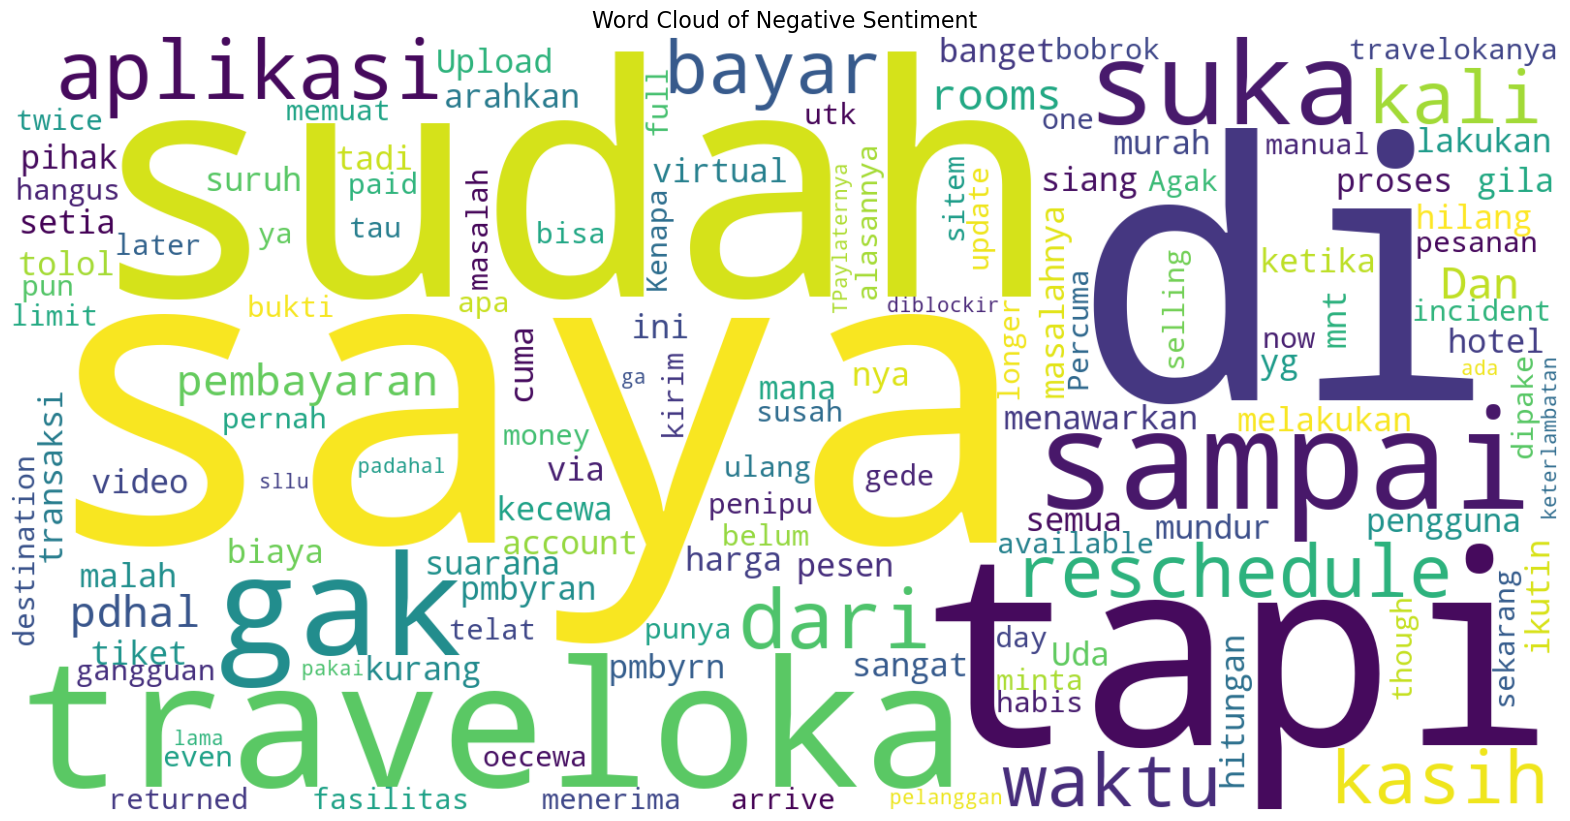

In [260]:
df_neg_lastest = df_lastest[df_lastest['Label'] == 'Negative']
df_neg_lastest = ' '.join(df_neg_lastest['content'].astype(str))

# Create the WordCloud object and assign it to wc
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis'
).generate(df_neg_lastest)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title("Word Cloud of Negative Sentiment", fontsize=16)
plt.imshow(wc, interpolation='bilinear')
plt.show()